In [1]:
import sys
sys.path.insert(0, '../functions/')

In [2]:
from skimage.filters import threshold_otsu
import tiffIO as tIO
import mouseVis as mv
import plosLib as pLib
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
#load the data
data0 = tIO.unzipChannels(tIO.loadTiff('../../data/SEP-GluA1-KI_tp1.tif'))[0][0:5]

In [10]:
#generate a foreground probability map for the data
probVox = pLib.pipeline(data0)

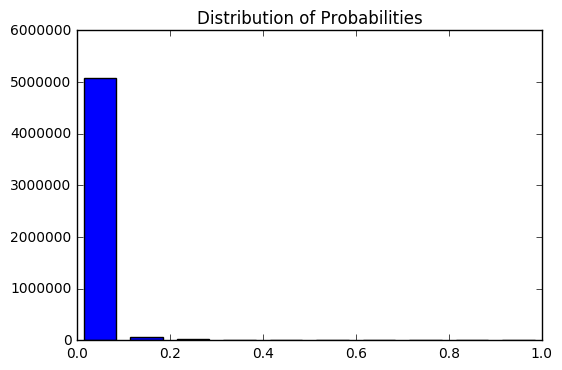

In [9]:
#generate a histogram to show bimodlity of the foreground probs
mv.generateVoxHist(probVox, figName='Distribution of Probabilities')
plt.show()

In [7]:
#get the thresholds that minimize inter class variance of the bimodal hist
threshList = np.stack([threshold_otsu(curSlice) for curSlice in probVox])
bianVox = np.stack([probVox[i] > thresh for i, thresh in enumerate(threshList)])